In [ ]:
https://towardsdatascience.com/mapping-the-worlds-flight-paths-with-python-232b9f7271e5

#### Convert lines to routes and then plot flightmap-esuqe lines

In [94]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt
import pandas as pd
import numpy as np

from shapely.geometry import Point, LineString

In [2]:
origin_destination_refugees=pd.read_csv("concept/df_target_origin.csv")

origin_destination_refugees['geometry']=origin_destination_refugees['geometry'].apply(wkt.loads)

In [3]:
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None
def parse_point(record):
    pieces = record.split() # splits each record into a list of 3
    x = float(pieces[1].lstrip('(')) # latitude
    y = float(pieces[2].rstrip(')')) # longitude 
    point = Point(x,y) # convert to Shapely Point
    return point

In [4]:
gdf=gpd.GeoDataFrame(origin_destination_refugees, geometry='geometry',crs=4326)

In [5]:
for i in ['target_UK','centres']:
    gdf[i]=gdf[i].apply(wkt.loads)

In [6]:
gdf['target_UK']=gpd.GeoSeries(gdf['target_UK'],crs=4326)


In [7]:
gdf['centres']=gpd.GeoSeries(gdf['centres'],crs=4326)

In [15]:
def hanging_line(point1, point2):
    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b

    return (x,y)

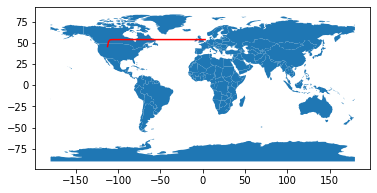

In [72]:
gdf.plot()
point1=[gdf.loc[4].centres.x,gdf.loc[4].centres.y]
point2=[gdf.loc[4].target_UK.x,gdf.loc[4].target_UK.y]

x,y = hanging_line(point1, point2)

plt.plot(x,y, color='red')

plt.show()


In [96]:
gdf_subset=gdf.loc[0]

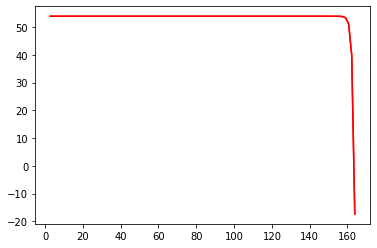

In [93]:
x,y=hanging_line([gdf_subset.centres.x,gdf_subset.centres.y]
                                                   ,[gdf_subset.target_UK.x,gdf_subset.target_UK.y])

plt.plot(x,y, color='red')

plt.show()

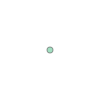

In [104]:
gdf_subset.centres

In [103]:
LineString(gdf_subset.centres.coords,gdf_subset.target_UK.coords)

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [73]:
for x
gdf['routes']=hanging_line([gdf.centres.x,gdf.centres.y], [gdf.target_UK.x,gdf.target_UK.y])

ValueError: Length of passed values is 100, index implies 178.